<a href="https://www.kaggle.com/code/melaneemelanee/facebook-eda?scriptVersionId=105587947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/facebook-data/pseudo_facebook.csv


In [2]:
df = pd.read_csv('/kaggle/input/facebook-data/pseudo_facebook.csv')

In [3]:
df.head()
#dob: day of birthday

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [6]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [7]:
#get_dummies() is used for data manipulation.
#It converts categorical data into dummy or indicator variables. 
#syntax: pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) Parameters: data: whose data is to be manipulated.
df = pd.get_dummies(df,columns=None)

In [8]:
df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0,0,1
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,1,0
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,0,1
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,1,0
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,0,1


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99001 entries, 0 to 99002
Data columns (total 16 columns):
userid                   99001 non-null int64
age                      99001 non-null int64
dob_day                  99001 non-null int64
dob_year                 99001 non-null int64
dob_month                99001 non-null int64
tenure                   99001 non-null float64
friend_count             99001 non-null int64
friendships_initiated    99001 non-null int64
likes                    99001 non-null int64
likes_received           99001 non-null int64
mobile_likes             99001 non-null int64
mobile_likes_received    99001 non-null int64
www_likes                99001 non-null int64
www_likes_received       99001 non-null int64
gender_female            99001 non-null uint8
gender_male              99001 non-null uint8
dtypes: float64(1), int64(13), uint8(2)
memory usage: 11.5 MB


In [11]:
df['age'].value_counts()

18     5196
23     4404
19     4391
20     3769
21     3671
       ... 
87       42
112      18
111      18
110      15
109       9
Name: age, Length: 101, dtype: int64

In [12]:
df['dob_year'].value_counts()

1995    5196
1990    4404
1994    4391
1993    3769
1992    3671
        ... 
1926      42
1902      18
1901      18
1903      15
1904       9
Name: dob_year, Length: 101, dtype: int64

In [13]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df.age,bins=np.arange(10,121,10),labels=labels,right=True)

In [14]:
df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male,age_group
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0,0,1,10-20
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,1,0,10-20
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,0,1,10-20
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,1,0,10-20
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,0,1,10-20


In [15]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male,age_group
98998,1268299,68,4,1945,4,541.0,2118,341,3996,18089,3505,11887,491,6202,1,0,61-70
98999,1256153,18,12,1995,3,21.0,1968,1720,4401,13412,4399,10592,2,2820,1,0,10-20
99000,1195943,15,10,1998,5,111.0,2002,1524,11959,12554,11959,11462,0,1092,1,0,10-20
99001,1468023,23,11,1990,4,416.0,2560,185,4506,6516,4506,5760,0,756,1,0,21-30
99002,1397896,39,15,1974,5,397.0,2049,768,9410,12443,9410,9530,0,2913,1,0,31-40


In [16]:
df.head(10-20)

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male,age_group
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0,0,1,10-20
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,1,0,10-20
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,0,1,10-20
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,1,0,10-20
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,0,1,10-20
5,1524765,14,1,1999,12,15.0,0,0,0,0,0,0,0,0,0,1,10-20
6,1136133,13,14,2000,1,12.0,0,0,0,0,0,0,0,0,0,1,10-20
7,1680361,13,4,2000,1,0.0,0,0,0,0,0,0,0,0,1,0,10-20
8,1365174,13,1,2000,1,81.0,0,0,0,0,0,0,0,0,0,1,10-20
9,1712567,13,2,2000,2,171.0,0,0,0,0,0,0,0,0,0,1,10-20


In [17]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
count,9.900100e+04,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000
mean,1.597042e+06,37.279048,14.530550,1975.720952,6.283361,537.887375,196.352885,107.453702,156.080646,142.691448,106.118272,84.121948,49.962314,58.569459,0.406582,0.591651
std,3.440585e+05,22.588436,9.015595,22.588436,3.529621,457.649874,387.307808,188.788658,572.286274,1387.933546,445.257265,839.897864,285.562930,601.422396,0.491198,0.491531
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298804e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000,0.000000,1.000000
75%,1.895741e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000,1.000000,1.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000,1.000000,1.000000


In [18]:
df['age_group'].unique()

[10-20, 21-30, 31-40, 41-50, 51-60, ..., 71-80, 81-90, 91-100, 101-110, 111-120]
Length: 11
Categories (11, object): [10-20 < 21-30 < 31-40 < 41-50 ... 81-90 < 91-100 < 101-110 < 111-120]

In [19]:
df['age_group'].value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3448
71-80       2249
91-100      1219
81-90        816
111-120      238
Name: age_group, dtype: int64

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


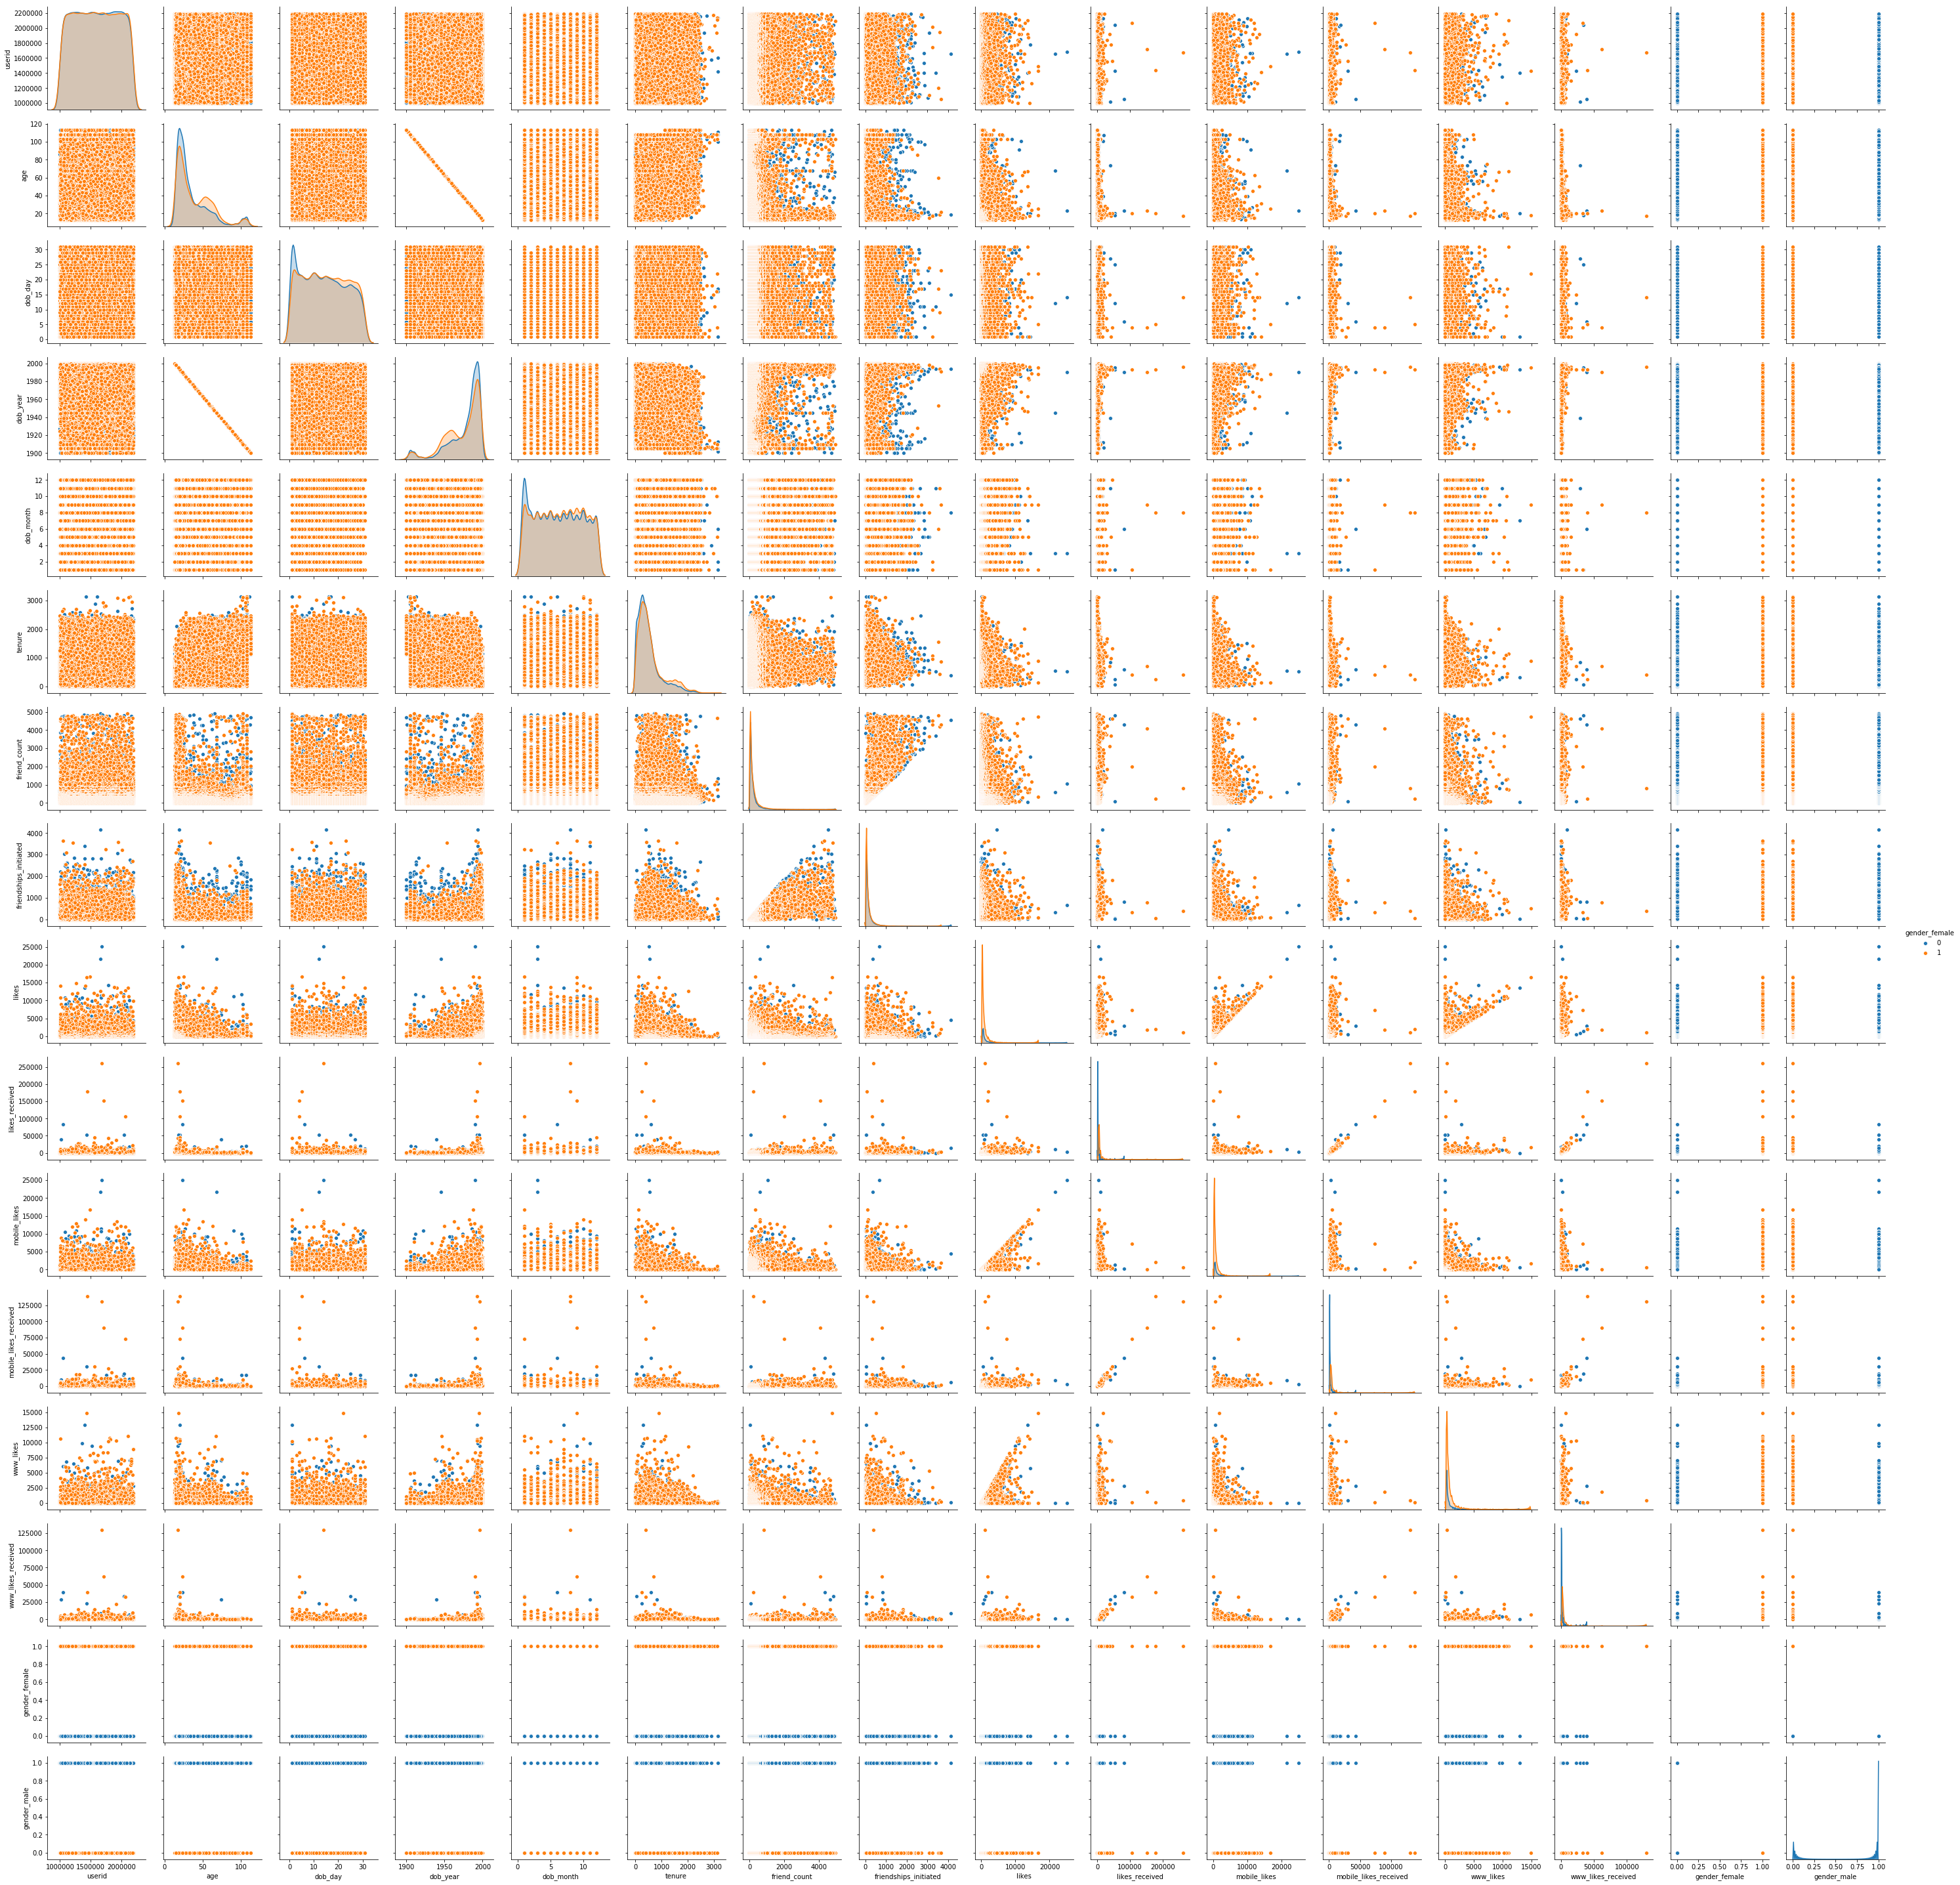

In [20]:
sns.pairplot(data = df, hue="gender_female")

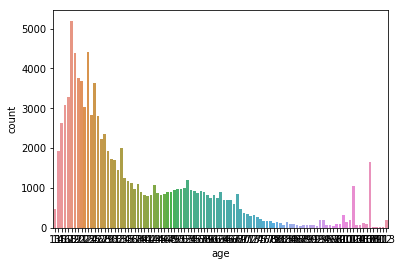

In [21]:
sns.countplot(x='age',data=df)

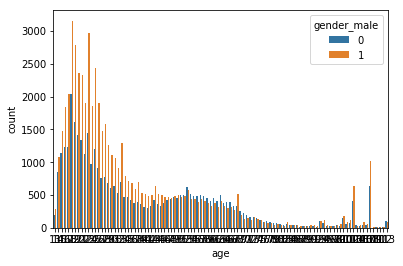

In [22]:
sns.countplot(x='age',hue='gender_male',data=df)

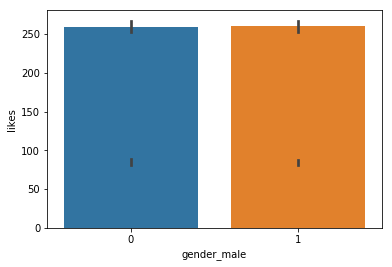

In [23]:
sns.barplot(df['gender_female'],df['likes'])
sns.barplot(df['gender_male'],df['likes'])

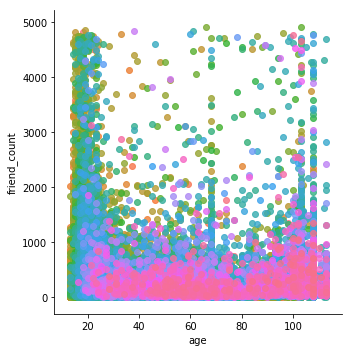

In [24]:
sns.lmplot( x="age", y="friend_count", data=df, fit_reg=False, hue='tenure', legend=False)

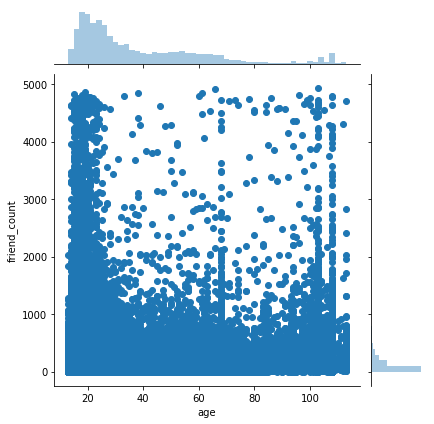

In [25]:
sns.jointplot(x='age',y='friend_count',data=df)

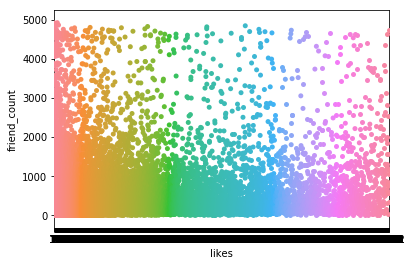

In [26]:
sns.stripplot(x='likes',y='friend_count',data=df,jitter=False)

**corr()** is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. 
Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.



Pairwise correlations uncover these potential relations of interest. Where associations are detected that, based upon prior knowledge, are judged indicative of relationships worth further study, adjustments for potential confounding variables must be made.

Link: https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10

In [27]:
df.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
userid,1.000000,-0.007296,-0.000817,0.007296,0.002955,-0.003446,-0.001314,-0.001589,-0.002876,0.001526,-0.004866,0.001753,0.001824,0.001073,0.001659,-0.001495
age,-0.007296,1.000000,0.035084,-1.000000,0.025177,0.462742,-0.027396,-0.058047,-0.013002,-0.022568,-0.026706,-0.024245,0.015584,-0.018223,0.079815,-0.085730
dob_day,-0.000817,0.035084,1.000000,-0.035084,0.129426,0.041855,0.021959,0.022994,0.015979,0.001366,0.014537,0.000496,0.009356,0.002460,0.046593,-0.045986
dob_year,0.007296,-1.000000,-0.035084,1.000000,-0.025177,-0.462742,0.027396,0.058047,0.013002,0.022568,0.026706,0.024245,-0.015584,0.018223,-0.079815,0.085730
dob_month,0.002955,0.025177,0.129426,-0.025177,1.000000,0.029446,0.019809,0.020077,0.014150,0.006496,0.010400,0.006436,0.012142,0.006004,0.035756,-0.034931
tenure,-0.003446,0.462742,0.041855,-0.462742,0.029446,1.000000,0.166256,0.133505,0.057132,0.027745,0.028052,0.023971,0.070757,0.030553,0.089244,-0.099113
friend_count,-0.001314,-0.027396,0.021959,0.027396,0.019809,0.166256,1.000000,0.825850,0.298016,0.236463,0.235656,0.232700,0.229803,0.220727,0.097507,-0.097330
friendships_initiated,-0.001589,-0.058047,0.022994,0.058047,0.020077,0.133505,0.825850,1.000000,0.285592,0.175131,0.229807,0.173803,0.214023,0.161439,0.028274,-0.027972
likes,-0.002876,-0.013002,0.015979,0.013002,0.014150,0.057132,0.298016,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687,0.150395,-0.150183
likes_received,0.001526,-0.022568,0.001366,0.022568,0.006496,0.027745,0.236463,0.175131,0.327376,1.000000,0.256997,0.973679,0.255365,0.947990,0.064860,-0.064854


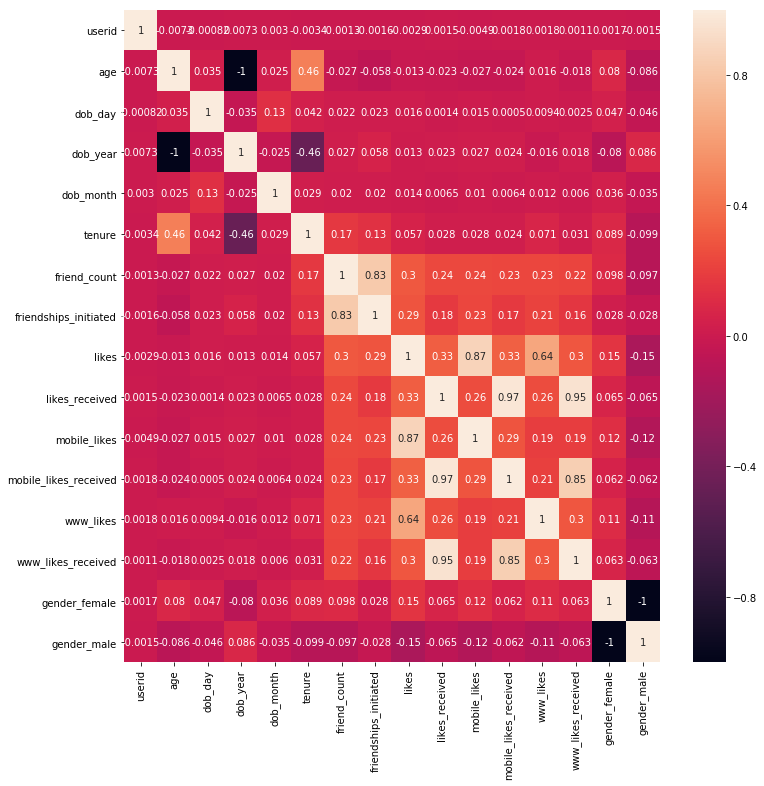

In [28]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()